In [0]:
# https://keras.io/
!pip install -q keras
import keras

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

**Load pre-shuffled MNIST data into train and test sets** Note that MNIST is a database of handwritten digits with 28 x 28 pixels

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


(60000, 28, 28)


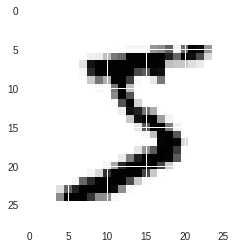

In [5]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

Here we are reshaping the x_train and x_test arrays from (num_samples,28,28) to (num_samples,28,28,1) 

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

Now we take a copy of the array, cast it to a float data type.Then we divide every number in the array by 255 to bring its values between 0 and 1. This is a form of regularization

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [8]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [10]:
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [12]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(32, 7, 7, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(10, 1, activation='relu'))
model.add(Convolution2D(10, 22))
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (7, 7), activation="relu", input_shape=(28, 28, 1...)`
  """


In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 22, 22, 32)        1600      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 22, 22, 10)        330       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 1, 1, 10)          48410     
_________________________________________________________________
flatten_1 (Flatten)          (None, 10)                0         
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
Total params: 50,340
Trainable params: 50,340
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [15]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/10
60000/60000 [==============================] - 18s 303us/step - loss: 0.1510 - acc: 0.9554
Epoch 2/10
60000/60000 [==============================] - 16s 274us/step - loss: 0.0588 - acc: 0.9816
Epoch 3/10
 5920/60000 [=>............................] - ETA: 14s - loss: 0.0376 - acc: 0.9882

60000/60000 [==============================] - 16s 273us/step - loss: 0.0422 - acc: 0.9868
Epoch 4/10
60000/60000 [==============================] - 16s 272us/step - loss: 0.0327 - acc: 0.9896
Epoch 5/10
13408/60000 [=====>........................] - ETA: 12s - loss: 0.0187 - acc: 0.9941

60000/60000 [==============================] - 16s 271us/step - loss: 0.0250 - acc: 0.9921
Epoch 6/10
60000/60000 [==============================] - 16s 275us/step - loss: 0.0200 - acc: 0.9934
Epoch 7/10
14976/60000 [======>.......................] - ETA: 12s - loss: 0.0156 - acc: 0.9955

60000/60000 [==============================] - 16s 273us/step - loss: 0.0163 - acc: 0.9947
Epoch 8/10
60000/60000 [==============================] - 16s 274us/step - loss: 0.0128 - acc: 0.9958
Epoch 9/10
15712/60000 [======>.......................] - ETA: 11s - loss: 0.0100 - acc: 0.9969

60000/60000 [==============================] - 16s 272us/step - loss: 0.0102 - acc: 0.9965
Epoch 10/10
60000/60000 [==============================] - 16s 273us/step - loss: 0.0096 - acc: 0.9966


In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [17]:
print(score)

[0.054080061103495565, 0.9857]


In [0]:
y_pred = model.predict(X_test)

In [19]:
print(y_pred[:9])
print(y_test[:9])

[[9.7764935e-20 9.7410443e-22 1.7463235e-10 9.4901750e-08 1.5670107e-21
  3.1169216e-20 5.1804953e-31 9.9999988e-01 1.6375451e-15 2.7710045e-09]
 [2.9121985e-12 1.2169130e-12 1.0000000e+00 2.0051152e-15 9.7431903e-24
  3.3571338e-20 5.2869943e-13 3.5752245e-24 9.7581231e-13 1.0833560e-21]
 [1.0491452e-09 9.9999905e-01 3.2004797e-07 2.8556985e-13 1.8484134e-07
  5.7486598e-12 1.0861826e-11 1.7212093e-07 2.8412225e-07 2.7511455e-11]
 [1.0000000e+00 8.2720743e-21 3.9336211e-11 1.6740368e-11 1.7655636e-15
  1.3305060e-10 3.7599740e-10 1.5316068e-11 2.8879676e-14 2.5484008e-09]
 [2.0234171e-16 3.2240351e-18 1.5525088e-16 2.7538096e-15 1.0000000e+00
  1.1252687e-17 8.7381309e-18 2.6074062e-13 2.2054421e-11 9.8726600e-09]
 [3.7746747e-11 9.9999654e-01 2.0112123e-09 4.3775763e-13 2.2097538e-08
  2.8955498e-16 7.1768178e-15 3.2931237e-06 1.1135702e-07 8.7531614e-11]
 [1.7518747e-18 5.3048854e-12 1.2555330e-07 5.8230384e-14 9.9948126e-01
  8.7799906e-12 3.0494417e-17 7.8272555e-10 5.1858707e-04 

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

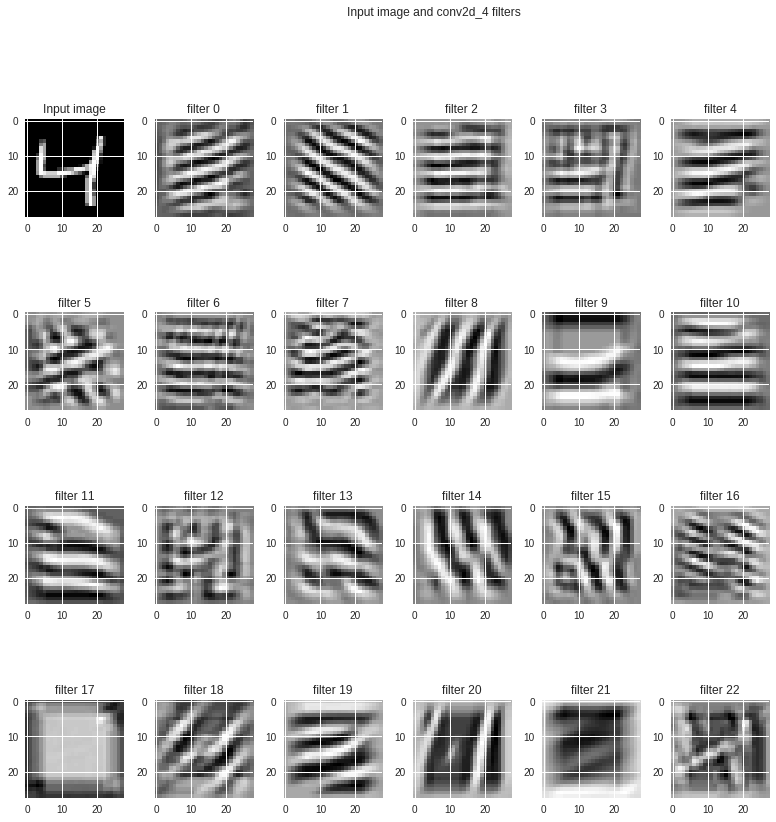

In [23]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_4'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()